# Evaluation of v2.2 Hydrofabric
## Author: Tadd Bindas

The goal of this notebook is to show that v2.2 of the enterprise hydrofabric works. The first part of the notebook preps the mapping of forcings between the v20 sample data and the v2.2 new HYFeatures IDs. From there, the notebook runs, then plots the output

#### Step 0: Read domain files and find mappings

In [1]:
from pathlib import Path

import geopandas as gpd
import pandas as pd

v20 = gpd.read_file(Path.cwd() / "../LowerColorado_TX_v4/domain/LowerColorado_NGEN_v201.gpkg", layer="divides")
v22 = gpd.read_file(Path.cwd() / "domain/LowerColorado_v22_no_lakes.gpkg", layer="divides")


In [2]:
# Running an intersection using geopandas to determine overlapping areas
intersections = gpd.overlay(v20, v22, how='intersection')

intersections['intersection_area'] = intersections.geometry.area

match_df = (intersections
          .sort_values('intersection_area', ascending=False)
          .groupby('divide_id_1')
          .first()
          .reset_index())
match_df


/home/tadd.bindas/github/pi4/t-route/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1816: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/tmp/ipykernel_3327733/1552843623.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 113168 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersections = gpd.overlay(v20, v22, how='intersection')


,divide_id_1,toid_1,type_1,ds_id_1,areasqkm_1,id_1,lengthkm_1,tot_drainage_areasqkm_1,has_flowline_1,divide_id_2,...,type_2,ds_id_2,areasqkm_2,vpuid,id_2,lengthkm_2,tot_drainage_areasqkm_2,has_flowline_2,geometry,intersection_area
0,cat-2420800,nex-2420801,network,None,23.324850,wb-2420800,3.688505,23.324850,True,cat-2430374,...,network,None,23.32035,12,wb-2430374,3.688505,23.32035,True,"POLYGON ((-545805.000 1088565.000, -545985.000...",2.325525e+07
1,cat-2420801,nex-2420802,network,None,8.005500,wb-2420801,4.614000,31.330350,True,cat-2430375,...,network,None,8.02170,12,wb-2430375,4.614000,31.34205,True,"POLYGON ((-541845.000 1086375.000, -541725.000...",7.974092e+06
2,cat-2420802,nex-2420803,network,None,11.651851,wb-2420802,2.736525,42.982200,True,cat-2430376,...,network,None,11.66400,12,wb-2430376,2.736525,43.00605,True,"POLYGON ((-538935.000 1086345.000, -538785.000...",1.161374e+07
3,cat-2420803,nex-2420804,network,None,44.238601,wb-2420803,3.183207,87.220800,True,cat-2430377,...,network,None,44.25795,12,wb-2430377,3.183207,87.26400,True,"POLYGON ((-541035.000 1084155.000, -540585.000...",4.411465e+07
4,cat-2420804,nex-2420805,network,None,19.522349,wb-2420804,7.095855,106.743150,True,cat-2430378,...,network,None,19.50930,12,wb-2430378,7.095855,106.77330,True,"POLYGON ((-537525.000 1079565.000, -537645.000...",1.944450e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,cat-2427766,nex-2427767,network,None,19.648800,wb-2427766,10.002514,19.648799,True,cat-2437339,...,network,None,15.85665,12,wb-2437339,14.609377,39.53835,True,"POLYGON ((-495.000 634965.000, -255.000 634965...",1.076994e+07
6967,cat-2427767,nex-2427743,network,None,5.018849,wb-2427767,6.177185,39.547798,True,cat-2437339,...,network,None,15.85665,12,wb-2437339,14.609377,39.53835,True,"POLYGON ((-825.000 627165.000, -735.000 627285...",4.993505e+06
6968,cat-2427768,nex-2427749,network,None,8.430749,wb-2427768,5.466302,8.430749,True,cat-2437340,...,network,None,8.41815,12,wb-2437340,5.466302,8.41815,True,"POLYGON ((465.000 624615.000, 315.000 624555.0...",8.389257e+06
6969,cat-2427769,nex-2427749,network,None,3.315600,wb-2427769,2.094882,3.315600,True,cat-2437341,...,network,None,3.32865,12,wb-2437341,2.094882,3.32865,True,"POLYGON ((-1665.000 627825.000, -1395.000 6275...",3.288103e+06


In [3]:
import numpy as np

# Finding matching feature IDs
domain_file = pd.read_csv(Path.cwd() / "../LowerColorado_TX_v4/channel_forcing/202304021100.CHRTOUT_DOMAIN1.csv")
feature_ids = np.sort(domain_file["feature_id"].values)
id_x = np.array([int(x.split("-")[1]) for x in match_df["divide_id_1"].values])
matching_ids = np.intersect1d(feature_ids, id_x)
matching_ids


array([2420801, 2420802, 2420803, ..., 2427764, 2427766, 2427767])

In [4]:
# Mapping v20 catchment IDs to v2.2
mapping = {}
dup_ids = []
for index, row in match_df.iterrows():
    _id = int(row["divide_id_1"].split("-")[1])
    if _id in matching_ids: 
        mapped_id = int(row["divide_id_2"].split("-")[1])
        if mapped_id in mapping.values():
            dup_ids.append(mapped_id)
        else:
            mapping[_id] = mapped_id


In [5]:
# Creating new Forcing CSV files
inputs_path = Path.cwd() / "../LowerColorado_TX_v4/channel_forcing"
outputs_path = Path.cwd() / "channel_forcing"
for file in inputs_path.glob("*.csv"):
    feature_ids = []
    values = []
    _df = pd.read_csv(file)
    val_col = _df.columns[1]
    for index, row in _df.iterrows():
        _id = row["feature_id"]
        feature_ids.append(mapping.get(_id, _id))
        values.append(row[val_col])
    _df = pd.DataFrame({
        "feature_id": feature_ids,
        val_col: values,
    })
    output_file = outputs_path / file.name
    _df.to_csv(output_file, index=False)


In [5]:
# Running the new T-route code
!python -m nwm_routing -f -V4 test_AnA_V4_HYFeature_v22.yaml


creating supernetwork connections set
2024-11-19 18:27:45,362 - fiona._env - DEBUG - [env.py:315 - defenv]: GDAL data found in package: path='/home/tadd.bindas/github/pi4/t-route/.venv/lib/python3.10/site-packages/fiona/gdal_data'.
2024-11-19 18:27:45,362 - fiona._env - DEBUG - [env.py:315 - defenv]: PROJ data found in package: path='/home/tadd.bindas/github/pi4/t-route/.venv/lib/python3.10/site-packages/fiona/proj_data'.
supernetwork connections set complete
... in 4.392185211181641 seconds.
2024-11-19 18:27:49,753 - root - INFO - [AbstractNetwork.py:581 - create_independent_networks]: organizing connections into reaches ...
2024-11-19 18:27:49,775 - root - DEBUG - [AbstractNetwork.py:610 - create_independent_networks]: reach organization complete in 0.021268367767333984 seconds.
2024-11-19 18:27:49,775 - root - INFO - [AbstractNetwork.py:756 - initial_warmstate_preprocess]: setting channel initial states ...
2024-11-19 18:27:49,776 - root - DEBUG - [AbstractNetwork.py:826 - initial_w

#### Step 1: Plotting the v2.2 outpus vs the v20.1 outputs

In [10]:
from pathlib import Path

import xarray as xr

base_paths = list((Path().cwd() / "output").glob("*.nc"))
original_paths = list((Path().cwd() / "../LowerColorado_TX_v4/output").glob("*.nc"))

datasets = [xr.open_dataset(f, engine="netcdf4") for f in base_paths]
v22_flow = xr.concat(datasets, dim="time").sortby('time')

datasets = [xr.open_dataset(f, engine="netcdf4") for f in original_paths]
v20_flow = xr.concat(datasets, dim="time").sortby('time')


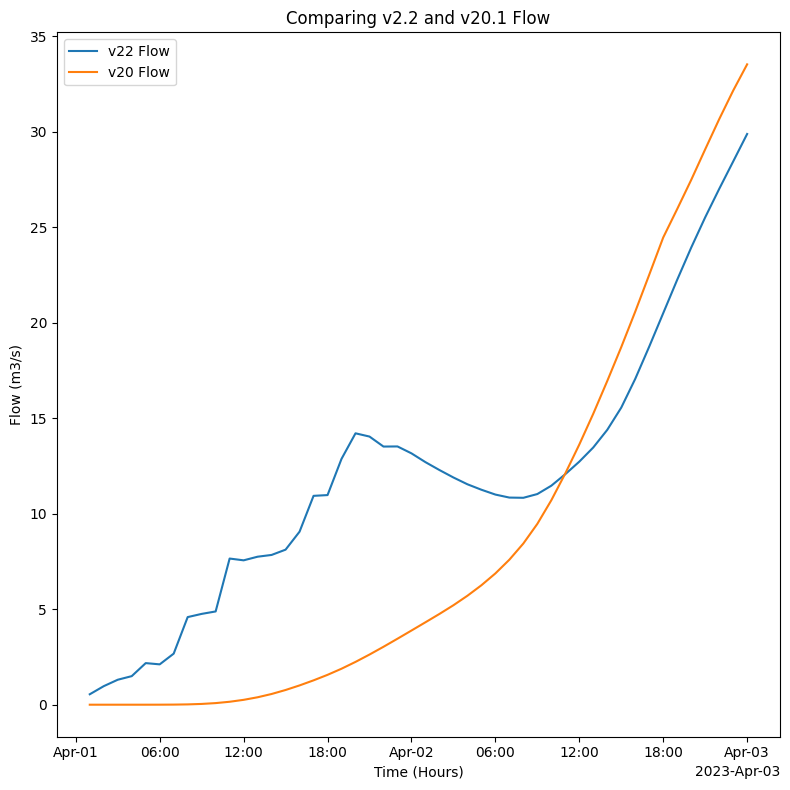

In [11]:
import matplotlib.pyplot as plt

v20_outflow_id = 2421104
v22_outflow_id = 2430686

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

v22_flow.sel(feature_id=v22_outflow_id).flow.plot(ax=ax, label='v22 Flow')
v20_flow.sel(feature_id=v20_outflow_id).flow.plot(ax=ax, label='v20 Flow')
ax.set_title('Comparing v2.2 and v20.1 Flow')
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Flow (m3/s)')
ax.legend()

plt.tight_layout()

plt.show()


While the forcings don't line up one to one, it's apparent the routing code is working and moving flow throughout the flow network